In [1]:
import os
print(os.getenv("HOME")+"/aiffel/ECG_data/physionet.org/files/circor-heart-sound/1.0.3")
path=os.getenv("HOME")+"/aiffel/ECG_data/physionet.org/files/circor-heart-sound/1.0.3/training_data"

/aiffel/aiffel/ECG_data/physionet.org/files/circor-heart-sound/1.0.3


training_data/num_txt
- 환자번호, 녹음 파일의 개수(av,pv 등등), 샘플레이트(초당 몇번을 나눴는지)
- n개의 녹음파일들 공백기준 hea, wav, tsv 확장자
- 환자 정보

training_data/num_xy_hea
- 파일명 신호의 수 샘플레이트 총 길이
- wav파일명, ??+?? , 

training_data/num_xy_wav
- 음성파일

training_data/num_xy_tsv
- 공백 기준 시작점 ,끝점 , 타입


In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt 

file_list = os.listdir(path)
patient_list = [os.path.join(path,file) for file in file_list if file.endswith(".txt")]

#------------------확인용-------------
wav_list = [os.path.join(path,file) for file in file_list if file.endswith(".wav")]
label_list = [os.path.join(path,file) for file in file_list if file.endswith(".tsv")]
head_list = [os.path.join(path,file) for file in file_list if file.endswith(".hea")]

In [3]:
print(len(file_list)) # 전체 파일
print(len(patient_list)) #환자에 대한 내용 
print(len(wav_list)) # wav 파일
print(len(label_list)) # 해당 파일 주석 정보
print(len(head_list)) #샘플레이트 길이가 들어있는 정보
print(patient_list[:5])

10432
942
3163
3163
3163
['/aiffel/aiffel/ECG_data/physionet.org/files/circor-heart-sound/1.0.3/training_data/50258.txt', '/aiffel/aiffel/ECG_data/physionet.org/files/circor-heart-sound/1.0.3/training_data/50715.txt', '/aiffel/aiffel/ECG_data/physionet.org/files/circor-heart-sound/1.0.3/training_data/68213.txt', '/aiffel/aiffel/ECG_data/physionet.org/files/circor-heart-sound/1.0.3/training_data/50304.txt', '/aiffel/aiffel/ECG_data/physionet.org/files/circor-heart-sound/1.0.3/training_data/49574.txt']


In [4]:
heas = []
wavs = []
tsvs = []

In [5]:
for path_txt in patient_list: 
    #print("{0}.hea".format(path_txt[:-4]))
    with open("{0}.txt".format(path_txt[:-4]), "r") as f:
        P_id, n, sr = f.readline().split()
        for _ in range(int(n)):
            #print(f.readline())
            _, hea, wav, tsv = f.readline().split()
            heas.append(hea)
            wavs.append(wav)
            tsvs.append(tsv)
    


In [6]:
len(wavs)

3163

In [7]:
# 음성 길이 확인
hea_list=[]
for hea in heas:
    path_hea = os.path.join(path,hea)
    with open(path_hea, "r") as f:
        id, _, sr, length = f.readline().split()
        hea_list.append(int(length)/float(sr))

평균 :  22.87030121719886
최대값 :  64.512
최소값 :  5.152
----
25
2545


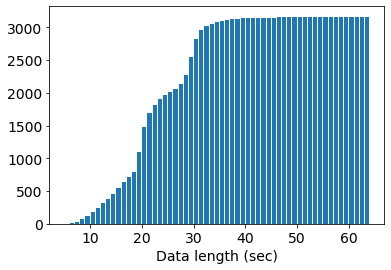

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

hea_list = np.array(hea_list) ## 데이터
bins = np.arange(5,65,1)

print("평균 : ", np.average(hea_list))
print("최대값 : ", np.max(hea_list))
print("최소값 : ", np.min(hea_list))

cut = pd.cut(hea_list, bins=bins) ## 데이터를 일정 구간으로 n등분한다.
#print(cut.describe())

plt.hist(hea_list, bins, rwidth = 0.8, cumulative=True)
plt.xlabel('Data length (sec)', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
print("----")
hist, _ =np.histogram(hea_list, bins=bins)
end_index = np.searchsorted(bins, 29, side='right')
print(end_index)

count = np.sum(hist[0:25])
print(count)#5~28초 사이의 데이터 개수

In [9]:
s1_ranges = []
s2_ranges = []
for tsv in tsvs:
    path_tsv = os.path.join(path,tsv)
    with open(path_tsv, "r") as f:
        while 1:
            line = f.readline()
            if not line: break
            start, end, s_type = line.split()
            if s_type == "1":
                s1_ranges.append(float(end)-float(start))
                
            elif  s_type == "3":
                s2_ranges.append(float(end)-float(start))
                
            else:
                break
        

In [10]:
s1_ranges = np.array(s1_ranges) ## 데이터
s2_ranges = np.array(s2_ranges)

bins = np.arange(5,65,1)

print("s1 길이 평균 : ", np.average(s1_ranges))
print("s1 길이 최대값 : ", np.max(s1_ranges))
print("s1 길이 최소값 : ", np.min(s1_ranges))
print("s1 표준편차 : ", np.std(s1_ranges))
print("---------------------")

print("s2 길이 평균 : ", np.average(s2_ranges))
print("s2 길이 최대값 : ", np.max(s2_ranges))
print("s2 길이 최소값 : ", np.min(s2_ranges))
print("s2 표준편자 : ", np.std(s2_ranges)) 

s1 길이 평균 :  0.1469171
s1 길이 최대값 :  0.38
s1 길이 최소값 :  0.04
s1 표준편차 :  0.05737163172762302
---------------------
s2 길이 평균 :  0.14016385294117645
s2 길이 최대값 :  0.29999999999999993
s2 길이 최소값 :  0.06
s2 표준편자 :  0.050747872373907196


In [21]:
import torch
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms

#정규화추가하기
#앵커박스 구현하기

class CustomDataset(torch.utils.data.Dataset): 
    
    def __init__(self, path, patient_list):
        self.path = path
        self.patient_list = patient_list

        self.get_file_list()
        self.x = self.get_mel_spectogram()
        self.y = self.get_label()
        
    def normalize_mel(S):
        return np.clip((S-min_level_db)/-min_level_db,0,1)
    
    def padding(self, aa, fixed_length=2801, padding_value=0):
        rows = []
        for a in aa:
            rows.append(np.pad(a, (0, fixed_length), 'constant', constant_values=padding_value)[:fixed_length])
        return np.concatenate(rows, axis=0).reshape(-1, fixed_length)

    def get_file_list(self):
        self.heas = []
        self.wavs = []
        self.tsvs = []
        
        for path_txt in self.patient_list:
            with open(path_txt, "r") as f:
                P_id, n, sr = f.readline().split()
                for _ in range(int(n)):
                    #print(f.readline())
                    _, hea, wav, tsv = f.readline().split()
                    self.heas.append(hea)
                    self.wavs.append(wav)
                    self.tsvs.append(tsv)
                    
        self.heas.sort()
        self.wavs.sort()
        self.tsvs.sort() 
                    
    def get_mel_spectogram(self):
        audio_arr = None
        start = 0
        for path_wav in self.wavs:
            path = os.path.join(self.path, path_wav)
            x = librosa.load(path, 4000)[0] # Audio Sample rate는 4000 고정  
            ms = librosa.feature.melspectrogram(x, 4000, n_fft=128, win_length=100, hop_length=40, n_mels=40) #nft 128
            # hop_length 자르는 간격(default = 10ms),  win_length 자르는 크기(default 25ms = 40hz)
            # n_fft 
            #norm_log_S = normalize_mel(librosa.power_to_db(ms, ref=np.max))
            #ms = librosa.power_to_db(ms)
            
            if ms.shape[-1] > 2801:
                ms = ms[:, :2801]
            
            elif ms.shape[-1] < 2801:
                ms = self.padding(ms, fixed_length=2801, padding_value=0)
                
            ms=ms[np.newaxis, :, :]
            
            if start == 0:
                audio_arr = np.array(ms)
                start = 1
            else:
                audio_arr = np.concatenate((audio_arr,ms), axis=0)
                
                #무시
                if start==5:#테스트용도
                    print(audio_arr.shape)
                    audio_arr = np.stack((audio_arr,ms), axis=0)
        
        return audio_arr
            
    def get_label(self):
        label = []
        for path_tsv in self.tsvs:
            path = os.path.join(self.path, path_tsv)
            #구간 불러와서 sr값 곱하고 100나누기
            #resize 시킨 값 으로 보간
            label.append(0)

        return label
    
    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx): 
        return self.x[idx], self.y[idx]

In [22]:
dataset = CustomDataset(path,patient_list)

In [242]:
len(dataset)

3163

(40, 2801)


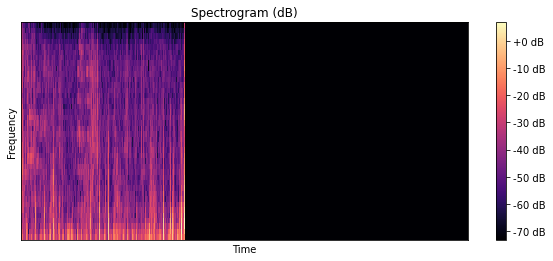

In [243]:
for d in dataset:
    x,y = d
    print(x.shape)

    plt.figure(figsize=(10,4))
    librosa.display.specshow(librosa.power_to_db(x), sr=4000, hop_length=40)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(format='%+2.0f dB')
    plt.title("Spectrogram (dB)")
    break

# 모델구현

# 아래는 연습용 

In [ ]:
plt.figure(figsize=(10,4))
librosa.display.specshow(log_spectrogram, sr=4000, hop_length=40)#librosa.power_to_db(ms)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")


Text(0.5, 1.0, 'Spectrogram (dB)')

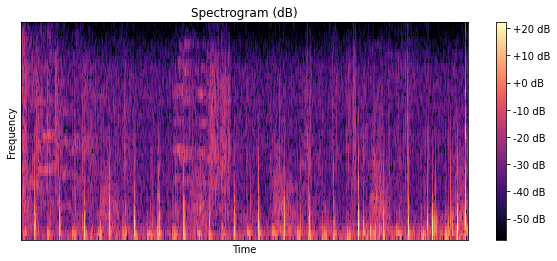

In [105]:
import torch
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms

test_wav=os.path.join(path,"13918_AV.wav")
x = librosa.load(test_wav,4000)[0]
ms = librosa.feature.melspectrogram(x, 4000, n_fft=128, win_length=100, hop_length=40, n_mels=40)
y = librosa.stft(x, n_fft=128, hop_length=40, win_length=100) 
# hop_length 자르는 간격(default = 10ms),  win_length 자르는 크기(default 25ms = 40hz)
# n_fft 
magnitude = np.abs(y)
log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure(figsize=(10,4))
librosa.display.specshow(log_spectrogram, sr=4000, hop_length=40)#librosa.power_to_db(ms)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")


In [93]:
x.shape

(41152,)

In [103]:
y.shape

(65, 1029)

In [106]:
ms.shape

array([[-45.58699 , -34.71022 , -32.088516, ..., -14.770639, -14.858177,
        -13.837774],
       [-42.9011  , -34.282177, -29.428368, ..., -12.702985, -12.100666,
        -12.501696],
       [-43.115578, -38.364395, -32.55256 , ..., -16.353745, -14.889721,
        -17.38189 ],
       ...,
       [-38.07405 , -36.880848, -32.599808, ..., -63.530346, -56.148705,
        -58.364067],
       [-35.60083 , -32.29136 , -30.096474, ..., -69.33465 , -62.22158 ,
        -63.52274 ],
       [-44.38922 , -39.477463, -35.12063 , ..., -65.19471 , -68.08653 ,
        -64.936646]], dtype=float32)

In [20]:
!python -m site

sys.path = [
    '/aiffel/aiffel/WorkPlace',
    '/aiffel/storage/package',
    '/opt/conda/lib/python39.zip',
    '/opt/conda/lib/python3.9',
    '/opt/conda/lib/python3.9/lib-dynload',
    '/opt/conda/lib/python3.9/site-packages',
]
USER_BASE: '/aiffel/.local' (exists)
USER_SITE: '/aiffel/.local/lib/python3.9/site-packages' (doesn't exist)
ENABLE_USER_SITE: True


In [89]:
array = np.empty((0,3))
array = np.append(array,np.array([[1,2,3]]),axis=0)
array = np.append(array,np.array([[4,5,6]]),axis=0)
array[0]

array([1., 2., 3.])

In [172]:
a = np.array([ms])

a = np.stack((a,ms), axis=0)
a = np.stack((a,ms), axis=0)
a = np.stack((a,ms), axis=0)
a = np.stack((a,ms), axis=0)
a = np.stack((a,ms), axis=0)
a = np.stack((a,ms), axis=0)
a[:,:,:1000].shape


(2, 40, 1000)

In [132]:
def padding(aa, fixed_length, padding_value=0):
    rows = []
    for a in aa:
        rows.append(np.pad(a, (0, fixed_length), 'constant', constant_values=padding_value)[:fixed_length])
    return np.concatenate(rows, axis=0).reshape(-1, fixed_length)

cc = [
        [1,2],
        [4,5,6],
        [7]
     ]

np.array(cc)

cc=padding(cc, fixed_length=2051, padding_value=0)

cc.shape

/tmp/ipykernel_31/225747002.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(cc)


(3, 2051)

In [134]:
cc[:,:2051].shape

(3, 2051)

In [156]:
array=np.empty((1, 2), dtype=int)
item = np.array([[3, 3]])
array = np.append(array, item, axis=0) 
array.shape

print(array)

[[   0 2051]
 [   3    3]]


In [250]:
t=[[3,4],[1,2]]

for x, y in t:
    print(x+y)

7
3


In [13]:
t= [[1,2]]
a = np.array(t)
a.append(t)
print(a.shape)

AttributeError: 'numpy.ndarray' object has no attribute 'append'